<a href="https://colab.research.google.com/github/allenlu2009/tensorflow2/blob/master/mnist/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 1. load data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# 2. build model
num_classes = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 3. train model with data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2654 - accuracy: 0.9251
Epoch 2/3
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1162 - accuracy: 0.9661
Epoch 3/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0791 - accuracy: 0.9761


In [7]:
# 4. validate model with data
model.evaluate(test_images, test_labels)        # evaluate = test

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0811 - accuracy: 0.9749


[0.08110959856007248, 0.9749]

In [8]:
# 5. infer/predict use trained model
pred_labels = model.predict(test_images)
pred_labels_Y = np.argmax(pred_labels, axis=1)
#print(pred_labels)
#print(test_labels)
#print(pred_labels_Y)
# confusion matrix
print(pd.crosstab(test_labels, pred_labels_Y, rownames=['label'], colnames=['predict']))

predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        972     0     0    1    1    1    1     1    2    1
1          0  1117     5    0    0    1    6     2    4    0
2          4     0  1010    1    2    0    3     7    4    1
3          0     0     9  968    0   14    0     5   14    0
4          2     0     2    1  951    0    5     0    2   19
5          2     0     0    4    1  871    7     1    5    1
6          8     2     1    0    3    8  935     0    1    0
7          2     2     9    2    1    1    0  1000    4    7
8          5     0     4    3    1    3    7     2  946    3
9          2     2     0    6    7    4    0     4    5  979


In [0]:
# 6. save/restore model and check the accuracy 
model.save('mnist_model.h5')
new_model = tf.keras.models.load_model('mnist_model.h5')
new_pred_labels = new_model.predict(test_images)
np.testing.assert_allclose(pred_labels, new_pred_labels, atol=1e-6)

In [0]:
# Export the model to a SavedModel for multiple platforms, only for TF2.x
#tf.keras.experimental.export_saved_model(model, 'fashion_mnist_model.h6')
#new_model = tf.keras.experimental.load_from_saved_model('fashion_mnist_model.h6')
#new_pred_labels = new_model.predict(test_images)
#np.testing.assert_allclose(pred_labels, new_pred_labels, atol=1e-6)

In [12]:
df = pd.DataFrame( {'label':test_labels, 'predict':pred_labels_Y})
print(df.shape)
df[:5]

(10000, 2)


,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [13]:
df[(df.label==4)&(df.predict==9)]

,label,predict
115,4,9
740,4,9
881,4,9
1242,4,9
1413,4,9
2053,4,9
2130,4,9
2514,4,9
2630,4,9
2877,4,9


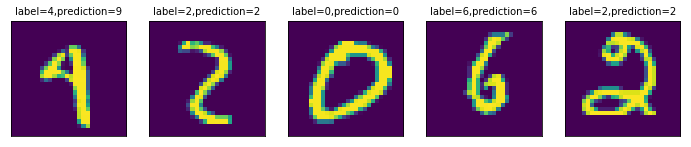

In [15]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        #ax.imshow(images[idx], cmap=’binary’)
        ax.imshow(images[idx])
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title=title+",prediction="+str(prediction[idx])
         
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

plot_images_labels_prediction(test_images, test_labels, pred_labels_Y, idx=740, num=5)